<a href="https://colab.research.google.com/github/silverstar0727/1day-1commit-challenge/blob/master/machine_learning_ch3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 규제를 이용한 overfitting 피하기
LogitsticRegression의 c값을 이용하여 규제를 할 수 있음
(가중치를 줄이는 느낌../?)

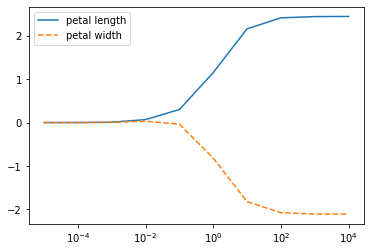

In [0]:
weights, params = [], []
for c in np.arange(-5,5):
  lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', C = 10. ** c, random_state = 1)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:,0], label = 'petal length')
plt.plot(params, weights[:, 1], linestyle = '--', label = 'petal width')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()

# 서포트 벡터머신을 이용한 최대마진 분류

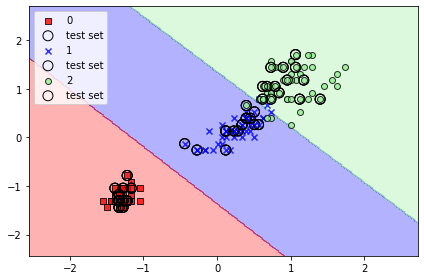

In [0]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C = 1.0, random_state = 1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = svm, test_idx = range(105, 150))

plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# 커널 SVM을 사용한 비선형 문제 풀기

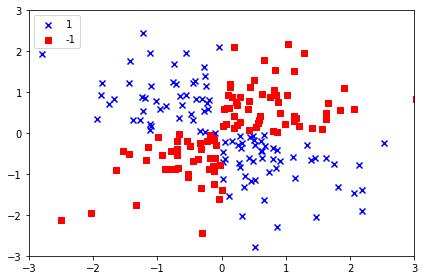

In [0]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1,1], c = 'b', marker = 'x', label = '1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c = 'r', marker = 's', label = '-1')

plt.xlim([-3, 3])
plt.ylim([-3,3])
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

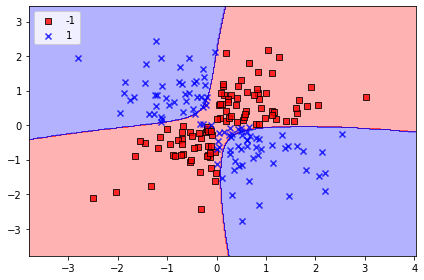

In [0]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.10, C = 10.0) # rbf: 방사기저함수(가우시안 커널)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

### gamma에 따른 분류정도

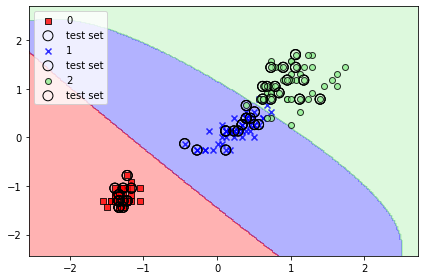

In [0]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.20, C = 1.0) # rbf: 방사기저함수(가우시안 커널)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = svm, test_idx = range(105,150))
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

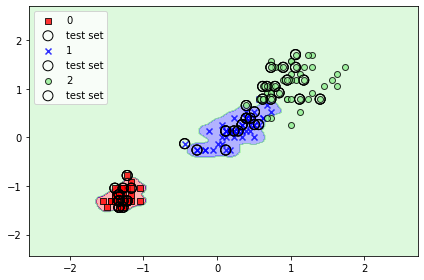

In [0]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 100.0, C = 1.0) # rbf: 방사기저함수(가우시안 커널)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = svm, test_idx = range(105,150))
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# Decision tree

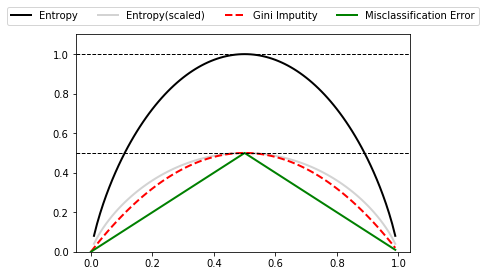

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
  return(p * (1-p) + (1-p) * (1-(1-p)))
def entropy(p):
  return -p * np.log2(p) - (1-p) * np.log2(1-p)
def error(p):
  return 1- np.max([p,1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], ['Entropy', 'Entropy(scaled)', 'Gini Imputity',
                                                        'Misclassification Error'],
                          ['-','-','--','-'], ['black', 'lightgray', 'red', 'green', 'cyan']):
  line = ax.plot(x, i , label = lab, linestyle = ls, lw = 2, color = c)
  
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 5, fancybox = True, shadow = False)
ax.axhline(y = 0.5, linewidth = 1, color = 'k', linestyle = '--')
ax.axhline(y = 1.0, linewidth = 1, color = 'k', linestyle = '--')
plt.ylim([0, 1.1])
plt.show()

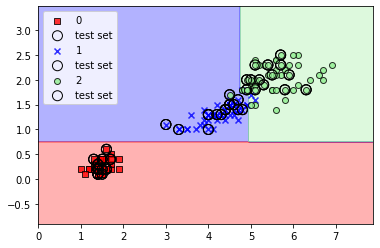

In [0]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier = tree, test_idx = range(105,150))
plt.legend(loc = 'upper left')
plt.show()

In [0]:
!pip3 install pydotplus

In [0]:
#결정트리 이미지 생성하기

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled = True, rounded = True,
                           class_names = ['setosa','Versicolor', 'Virginica'],
                           feature_names = ['petal length', 'petal width'],
                           out_file = None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree png')

True

### RandomForest 사용


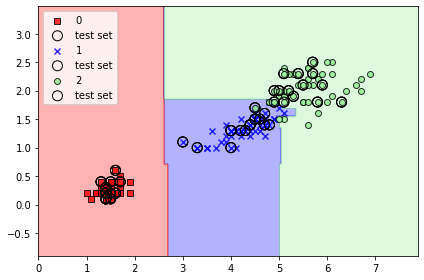

In [0]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'gini', n_estimators = 25, random_state = 1, n_jobs = 2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier = forest, test_idx = range(105,150))
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# K-Nearest Neighbor - KNN
최근접 이웃 알고리즘

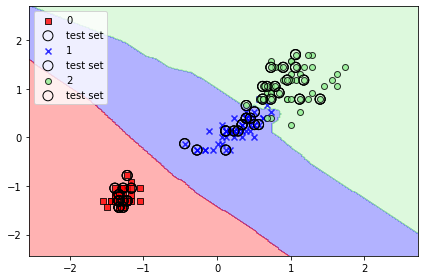

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = knn, test_idx = range(105,150))

plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()